In [ ]:
# EDA
# SPLIT AND TRAIN
# CHECK LOSSES, OVERFITTING 
# MODEL EVALUATION

In [49]:
# load libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# read file
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# check out stats
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# check for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Figure size 1200x600 with 0 Axes>

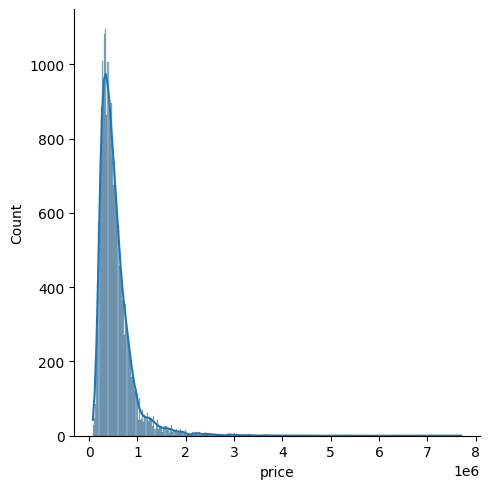

In [7]:
plt.figure(figsize=(12,6))
sns.displot(df['price'], kde=True)

<Axes: xlabel='bedrooms', ylabel='count'>

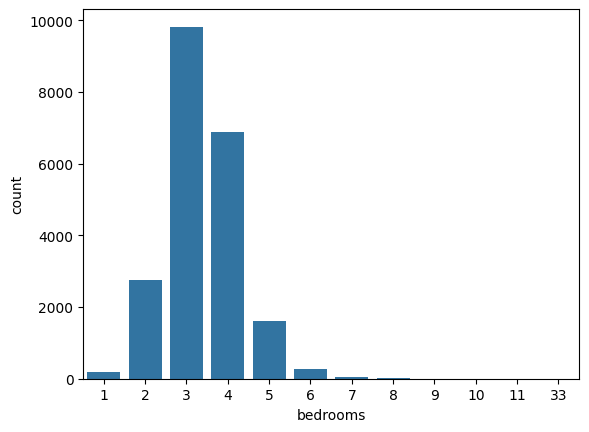

In [8]:
sns.countplot(data=df, x='bedrooms')

<Axes: xlabel='price', ylabel='sqft_living'>

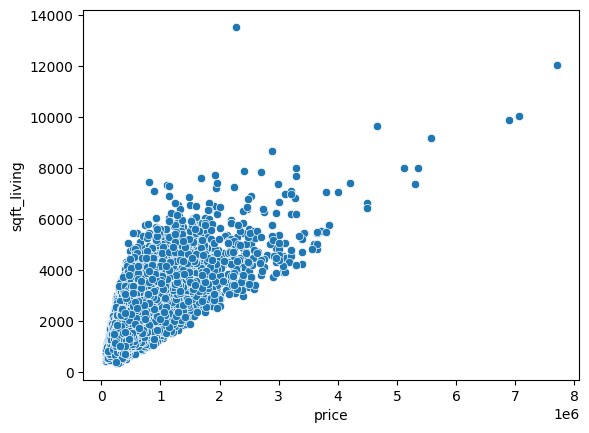

In [9]:
sns.scatterplot(x='price', y = 'sqft_living', data = df)

<Axes: xlabel='price', ylabel='lat'>

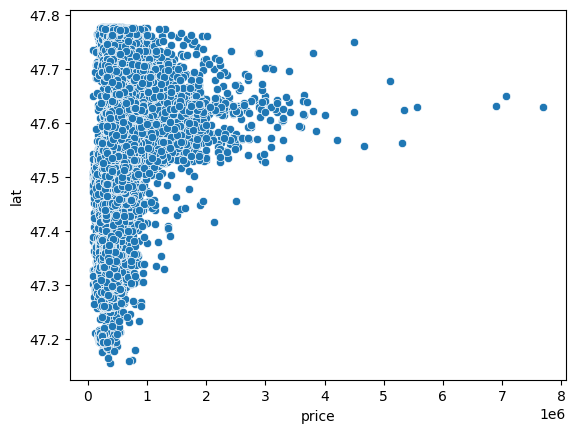

In [10]:
sns.scatterplot(data=df, x= 'price', y= 'lat')

<Axes: xlabel='price', ylabel='long'>

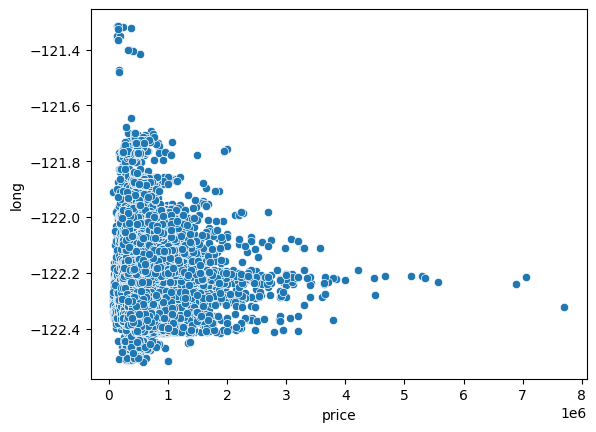

In [11]:
sns.scatterplot(data=df, x= 'price', y= 'long')

<Axes: xlabel='long', ylabel='lat'>

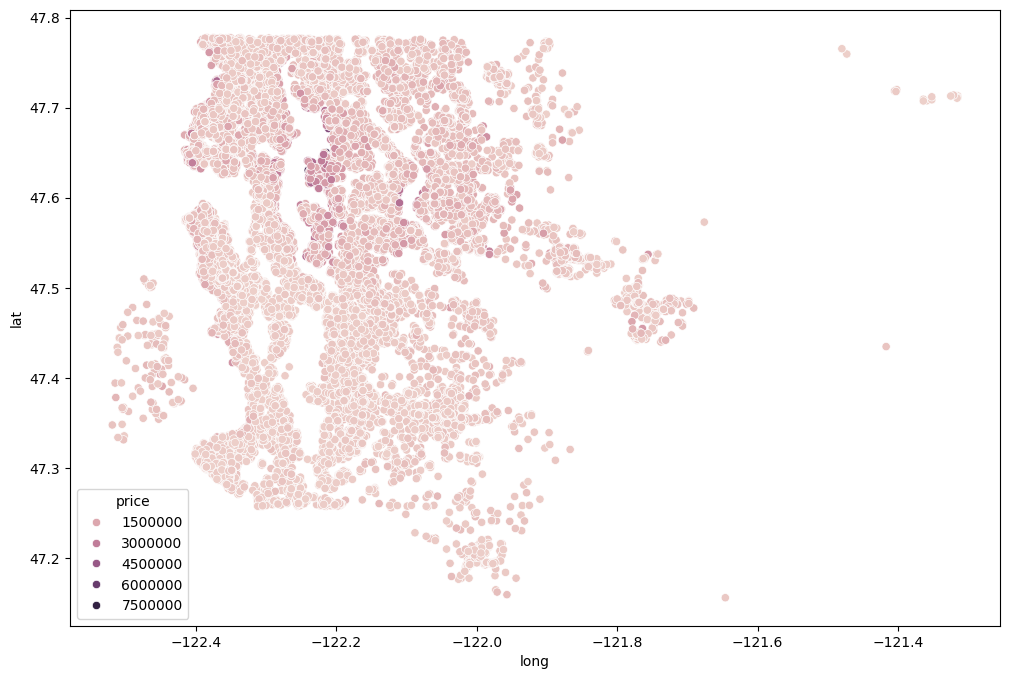

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x= 'long', y= 'lat', hue='price')

In [13]:
# Feature Engineering

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [16]:
df =  df.drop(columns='id', axis = 1)

In [17]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [18]:
df['month'] = df['date'].apply(lambda date: date.month)

In [19]:
df['year'] = df['date'].apply(lambda date: date.year)

In [20]:
df = df.drop(columns = 'date', axis=1)

In [21]:
df = df.drop(columns = 'zipcode', axis=1)

In [22]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [23]:
df.corr()['price'].sort_values()

month           -0.009928
year             0.003727
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='month'>

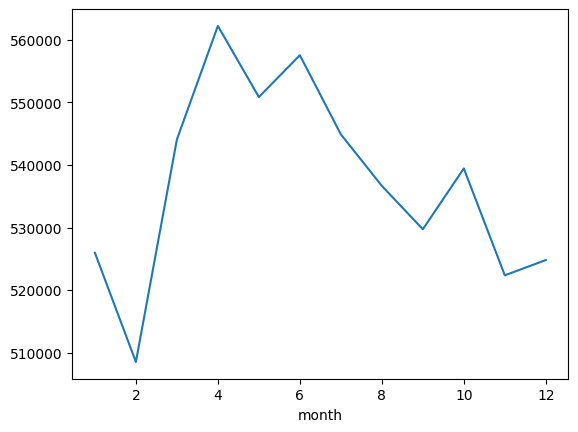

In [24]:
df.groupby('month').mean()['price'].plot()

In [25]:
# model 

In [26]:
X = df.drop(columns = 'price', axis = 1).values
y = df['price'].values

In [27]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 1.000e+01,
        2.014e+03],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 1.200e+01,
        2.014e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.000e+00,
        2.015e+03],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 6.000e+00,
        2.014e+03],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 1.000e+00,
        2.015e+03],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 1.000e+01,
        2.014e+03]])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit_transform(X_train)

array([[0.3       , 0.08      , 0.19855222, ..., 0.00657863, 0.72727273,
        0.        ],
       [0.2       , 0.28      , 0.1302999 , ..., 0.00288289, 0.45454545,
        0.        ],
       [0.3       , 0.48      , 0.25646329, ..., 0.00588823, 0.36363636,
        1.        ],
       ...,
       [0.1       , 0.2       , 0.14788004, ..., 0.00786147, 0.27272727,
        1.        ],
       [0.2       , 0.24      , 0.11685626, ..., 0.01557367, 0.27272727,
        1.        ],
       [0.1       , 0.08      , 0.08169597, ..., 0.00515118, 0.        ,
        1.        ]])

In [33]:
scaler.transform(X_test)

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [34]:
from tensorflow.keras.models import Sequential

In [36]:
from tensorflow.keras.layers import Dense

In [42]:
model = Sequential()

model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = 'Adam', loss = 'mse')

In [43]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size=128, epochs = 400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 407329767424.0000 - val_loss: 304177381376.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299830345728.0000 - val_loss: 117644025856.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99360333824.0000 - val_loss: 75033001984.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74797105152.0000 - val_loss: 71403175936.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76847988736.0000 - val_loss: 68290064384.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73278488576.0000 - val_loss: 65889132544.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66027384832.0000 - val_loss: 63891738624.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64211816448.0000 - val_loss: 62578589696.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65931288576.0000 - val_loss: 62224416768.0000
Epoch 10/400
119/119 ━━━━━━━━━━━

In [47]:
loss = pd.DataFrame(model.history.history)

<Axes: >

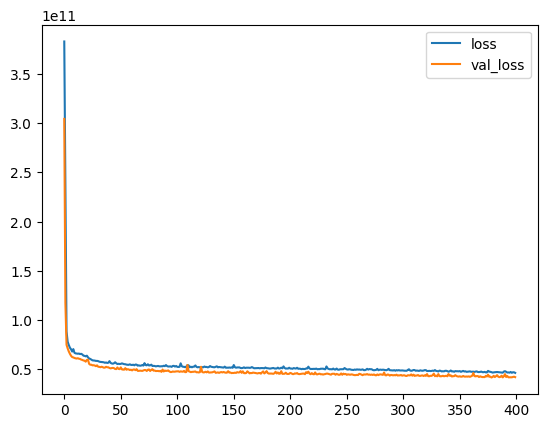

In [48]:
loss.plot()

In [ ]:
# Model evaluation 

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [51]:
prediction = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [54]:
mean_squared_error(y_test, prediction)

42384783275.98532

In [55]:
mean_absolute_error(y_test, prediction)

138286.62919560185

In [62]:
explained_variance_score(y_test,prediction)

0.6809734471725389

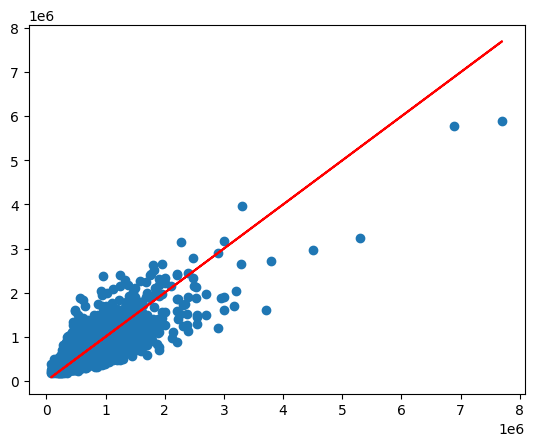

In [64]:
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,'r')